<a href="https://colab.research.google.com/github/TeamHub2/Deep-Learning/blob/main/Covit_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SHAPE = (224, 224,3)

train_path = '/content/drive/MyDrive/Covit19/Covid19-dataset/train'
test_path = '/content/drive/MyDrive/Covit19/Covid19-dataset/test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   rotation_range=10,
                                   brightness_range=[0.5, 1.5],
                                   vertical_flip=False,
                                   horizontal_flip = False)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 251 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle =False)

Found 66 images belonging to 3 classes.


In [ ]:

dense = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False) #MobileNetV2 model algorithom download

for layer in dense.layers:
    layer.trainable = False

x = Flatten()(dense.output)
prediction = Dense(3, activation='softmax')(x) #customize the model with our dataset
model = Model(inputs=dense.input, outputs=prediction)

model.compile( #compiling our customize model
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

callbacks = [tf.keras.callbacks.TensorBoard(log_dir='log/{}'.format(dt.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")))]

In [ ]:
h=model.fit(
  training_set,
  validation_data=test_set,
  batch_size=32, #data train korbe 8 ta kore ekbare
  epochs=10, #hole data ke total 20 bar train korano hoi
  
)

Epoch 1/10
8/8 [==============================] - 20s 2s/step - loss: 3.0221 - accuracy: 0.6414 - val_loss: 0.2156 - val_accuracy: 0.9242
Epoch 2/10
8/8 [==============================] - 16s 2s/step - loss: 1.2045 - accuracy: 0.8845 - val_loss: 0.9416 - val_accuracy: 0.8182
Epoch 3/10
8/8 [==============================] - 16s 2s/step - loss: 0.5803 - accuracy: 0.9283 - val_loss: 0.3890 - val_accuracy: 0.9242
Epoch 4/10
8/8 [==============================] - 16s 2s/step - loss: 0.3352 - accuracy: 0.9482 - val_loss: 0.4258 - val_accuracy: 0.9091
Epoch 5/10
8/8 [==============================] - 16s 2s/step - loss: 0.3758 - accuracy: 0.9442 - val_loss: 0.4635 - val_accuracy: 0.9242
Epoch 6/10
8/8 [==============================] - 16s 2s/step - loss: 0.2281 - accuracy: 0.9482 - val_loss: 0.5314 - val_accuracy: 0.9394
Epoch 7/10
8/8 [==============================] - 16s 2s/step - loss: 0.3416 - accuracy: 0.9442 - val_loss: 0.2313 - val_accuracy: 0.9545
Epoch 8/10
8/8 [==================

In [ ]:
loss,test_accuracy =model.evaluate(test_set)
print('Accuracy on test:', test_accuracy)

3/3 [==============================] - 2s 499ms/step - loss: 0.5389 - accuracy: 0.9242
Accuracy on test: 0.9242424368858337


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# T0 print the Classification Report
y_pred =model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(test_set.classes, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.89      0.85      0.87        20
           2       0.86      0.90      0.88        20

    accuracy                           0.92        66
   macro avg       0.92      0.92      0.92        66
weighted avg       0.92      0.92      0.92        66



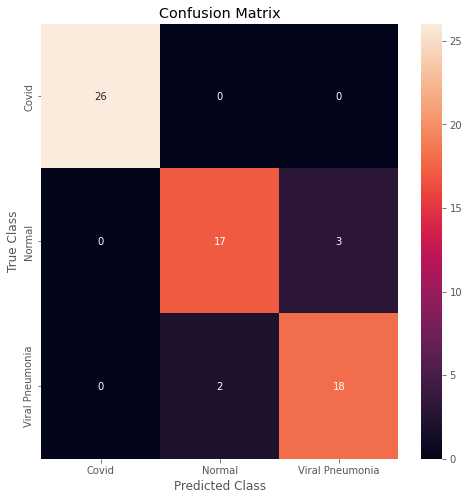

In [ ]:
# To print the Confusion Matrix
cf_matrix = confusion_matrix(test_set.classes,y_pred)
Labels = ['Covid','Normal','Viral Pneumonia']
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(cf_matrix, xticklabels=Labels, yticklabels=Labels, annot=True, fmt='d', color='blue')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

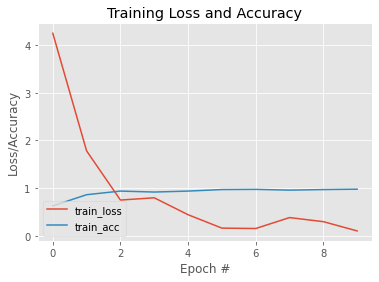

In [ ]:
# plot the training loss and accuracy
N = epochs=10
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), h.history["loss"], label="train_loss")
#plt.plot(np.arange(0, N), h.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), h.history["accuracy"], label="train_acc")
#plt.plot(np.arange(0, N), h.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")